In [1]:
!pip install tensorflow


Defaulting to user installation because normal site-packages is not writeable


In [2]:
import os
import numpy as np
import geopandas as gpd

In [3]:
os.chdir(r"E:\my_activity\talar\Talar")

In [4]:
data = gpd.read_file('landslide_data.shp')
data

,landslide,aspect,curvature,dem,dis_fault,dis_rivers,dis_roads,geology,ndvi,slope,TWI,geometry
0,1,200.3480,0.134143,1979,1621.970,1202.590,159.204,4,0.640719,9.79564,5.51556,POINT Z (698717.758 3987265.427 0.000)
1,1,56.3938,-0.268286,2373,891.445,2934.820,136.517,4,0.223214,33.92810,4.88805,POINT Z (660286.607 3985370.803 0.000)
2,1,350.1060,5.499870,493,1001.330,675.447,628.570,6,0.723589,46.44230,3.60129,POINT Z (669162.406 4015433.251 0.000)
3,1,301.1580,2.012150,501,1306.570,273.033,342.110,3,0.687533,33.30540,5.15042,POINT Z (669985.232 4016236.274 0.000)
4,1,-0.0000,-0.134143,478,911.294,213.246,610.521,3,0.706312,26.64850,6.34193,POINT Z (672826.651 4016706.500 0.000)
...,...,...,...,...,...,...,...,...,...,...,...,...
635,0,320.5080,-0.134143,1987,613.566,2244.360,371.366,4,0.584678,10.69100,6.63453,POINT Z (699711.538 3986952.664 0.000)
636,0,31.7209,-0.134143,1936,810.408,2294.940,172.682,4,0.561526,6.51402,8.06491,POINT Z (699793.433 3987398.593 0.000)
637,0,17.1745,-0.268286,1929,993.857,2198.050,115.838,4,0.583911,7.71918,6.87510,POINT Z (699693.641 3987577.573 0.000)
638,0,180.0000,0.134143,1971,1749.550,1623.570,426.492,4,0.582831,1.85433,7.33461,POINT Z (698604.838 3988513.495 0.000)


In [5]:
data_array = np.array(data)

In [6]:
X = data_array[:,1:11]
X.shape

(640, 10)

In [7]:
Y = data_array[:,:1]
# one_columns = np.ones((640,1))
# Y = np.column_stack([Y, one_columns])
Y= Y.astype(int)
Y.shape

(640, 1)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42,)
print('shape of X train', X_train.shape)
print("shape of X test", X_test.shape)
print("shape of y train", y_train.shape)
print("shape of y test", y_test.shape)

shape of X train (512, 10)
shape of X test (128, 10)
shape of y train (512, 1)
shape of y test (128, 1)


In [9]:
X_train = np.asarray(X_train).astype('float32')
y_train = np.asarray(y_train).astype('float32')
X_test = np.asarray(X_test).astype('float32')
y_test = np.asarray(y_test).astype('float32')


In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.fit(X_test)

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
model_lr = LogisticRegression()
model_lr.fit(X_train_scaled, y_train)
y_pred = model_lr.predict(X_test)
accuracy = classification_report(y_test, y_pred)
print(accuracy)

              precision    recall  f1-score   support

         0.0       0.86      0.46      0.60        67
         1.0       0.61      0.92      0.73        61

    accuracy                           0.68       128
   macro avg       0.73      0.69      0.67       128
weighted avg       0.74      0.68      0.66       128



d:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [12]:
from sklearn.svm import SVC 
model_svm = SVC(kernel='poly', gamma=1,)
model_svm.fit(X_train_scaled,y_train)
y_pred = model_svm.predict(X_test)
accuracy=classification_report(y_test, y_pred)
print(accuracy)

              precision    recall  f1-score   support

         0.0       0.62      0.58      0.60        67
         1.0       0.57      0.61      0.59        61

    accuracy                           0.59       128
   macro avg       0.59      0.59      0.59       128
weighted avg       0.60      0.59      0.59       128



d:\Anaconda\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [13]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=100)
model_rf.fit(X_train_scaled, y_train)
y_pred = model_rf.predict(X_test)
accuracy = classification_report(y_test, y_pred)
print(accuracy)

d:\Anaconda\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        67
         1.0       0.48      1.00      0.65        61

    accuracy                           0.48       128
   macro avg       0.24      0.50      0.32       128
weighted avg       0.23      0.48      0.31       128



d:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
import tensorflow as tf 
from tensorflow import keras

model_nn = keras.Sequential()
model_nn.add(keras.layers.Dense(units = 512, activation = 'sigmoid'))
model_nn.add(keras.layers.Dense(units = 128, activation = 'sigmoid'))
model_nn.add(keras.layers.Dense(units = 64, activation = 'sigmoid'))
model_nn.add(keras.layers.Dense(units = 32, activation = 'sigmoid'))
model_nn.add(keras.layers.Dense(units = 1, activation = 'linear'))


optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)


model_nn.compile(optimizer=optimizer, loss='mean_squared_error', metrics='accuracy')
history  = model_nn.fit(X_train, y_train, batch_size=5, epochs=100, validation_data=[X_test, y_test])




Epoch 1/100


103/103 [==============================] - 2s 5ms/step - loss: 0.2123 - accuracy: 0.6680 - val_loss: 0.1379 - val_accuracy: 0.8203
Epoch 2/100
103/103 [==============================] - 0s 3ms/step - loss: 0.1597 - accuracy: 0.7578 - val_loss: 0.1289 - val_accuracy: 0.8516
Epoch 3/100
103/103 [==============================] - 0s 3ms/step - loss: 0.1457 - accuracy: 0.7891 - val_loss: 0.1263 - val_accuracy: 0.8359
Epoch 4/100
103/103 [==============================] - 0s 3ms/step - loss: 0.1388 - accuracy: 0.7988 - val_loss: 0.1253 - val_accuracy: 0.8359
Epoch 5/100
103/103 [==============================] - 0s 3ms/step - loss: 0.1448 - accuracy: 0.7969 - val_loss: 0.1493 - val_accuracy: 0.8203
Epoch 6/100
103/103 [==============================] - 0s 3ms/step - loss: 0.1316 - accuracy: 0.8242 - val_loss: 0.1415 - val_accuracy: 0.8125
Epoch 7/100
103/103 [==============================] - 0s 4ms/step - loss: 0.1276 - accuracy: 0.8164 - val_loss: 0.1216 - val_accuracy: 0.

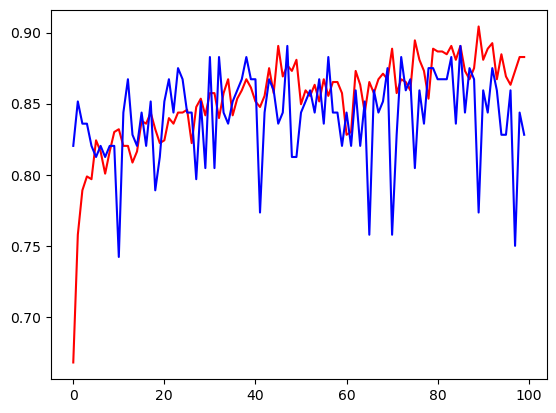

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color= 'red')
plt.plot(history.history['val_accuracy'], color='blue')


In [19]:
import tensorflow as tf 
from tensorflow import keras

model_nn = keras.Sequential()
model_nn.add(keras.layers.Dense(units = 512, activation = 'relu'))
model_nn.add(keras.layers.BatchNormalization())
model_nn.add(keras.layers.Dense(units = 128, activation = 'relu'))
model_nn.add(keras.layers.BatchNormalization())
model_nn.add(keras.layers.Dense(units = 64, activation = 'relu'))
model_nn.add(keras.layers.BatchNormalization())
model_nn.add(keras.layers.Dense(units = 32, activation = 'relu'))
model_nn.add(keras.layers.BatchNormalization())
model_nn.add(keras.layers.Dense(units = 1, activation = 'linear'))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model_nn.compile(optimizer=optimizer, loss='mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()])

early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model_nn.fit(X_train, y_train, 
                       batch_size=5, 
                       epochs=100, 
                       validation_split=0.2, 
                       callbacks=[early_stopping])


Epoch 1/100
82/82 [==============================] - 3s 9ms/step - loss: 1.1037 - mean_absolute_error: 0.8076 - val_loss: 8.4068 - val_mean_absolute_error: 2.1016
Epoch 2/100
82/82 [==============================] - 0s 5ms/step - loss: 0.5360 - mean_absolute_error: 0.5820 - val_loss: 3.2012 - val_mean_absolute_error: 1.3517
Epoch 3/100
82/82 [==============================] - 0s 5ms/step - loss: 0.3882 - mean_absolute_error: 0.5067 - val_loss: 2.2946 - val_mean_absolute_error: 1.0362
Epoch 4/100
82/82 [==============================] - 0s 5ms/step - loss: 0.2963 - mean_absolute_error: 0.4340 - val_loss: 1.3736 - val_mean_absolute_error: 0.7514
Epoch 5/100
82/82 [==============================] - 0s 5ms/step - loss: 0.2896 - mean_absolute_error: 0.4284 - val_loss: 0.9650 - val_mean_absolute_error: 0.6471
Epoch 6/100
82/82 [==============================] - 0s 5ms/step - loss: 0.2346 - mean_absolute_error: 0.3896 - val_loss: 0.5469 - val_mean_absolute_error: 0.5300
Epoch 7/100
82/82 [===

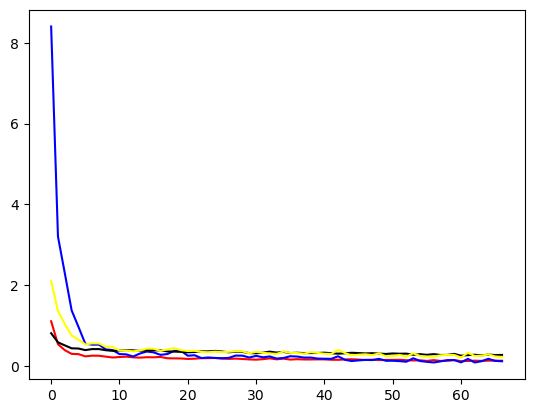

In [23]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], color= 'red')
plt.plot(history.history['val_loss'], color='blue')
plt.plot(history.history['mean_absolute_error'], color= 'black')
plt.plot(history.history['val_mean_absolute_error'], color='yellow')


In [16]:
import rasterio 
landslide = rasterio.open('landslide_co11.tif')
landslide_array = landslide.read()
landslide_reshape = landslide_array.reshape(landslide_array.shape[0],-1).T
landslide_reshape.shape
landslide_array.shape

(10, 4167, 2878)

In [17]:
revise_nan = np.nan_to_num(landslide_reshape)
revise_nan[revise_nan == -3.4028235e+38] = 0


In [18]:
prediction = model_nn.predict(revise_nan)


  7316/374770 [..............................] - ETA: 10:19

KeyboardInterrupt: 

In [ ]:
prediction.shape

(11992626, 1)

In [ ]:
proabilty = prediction[:,1]

IndexError: index 1 is out of bounds for axis 1 with size 1

In [ ]:
proability_reshape = prediction.reshape((4167, 2878))

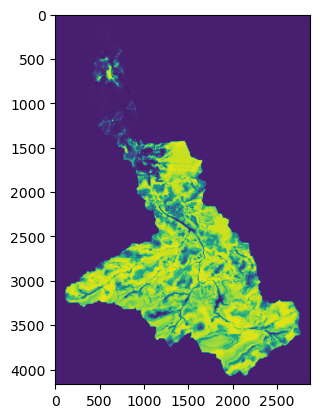

In [ ]:
import matplotlib.pyplot as plt 
plt.imshow(proability_reshape)

In [ ]:
# Define output file path
output_file = r"E:\my_activity\talar\Talar\nn_model.tif"

# Get CRS from Landsat image
crs = landslide.crs

# Define the profile for the output file
profile = {
    'driver': 'GTiff',
    'width': proability_reshape.shape[1],
    'height': proability_reshape.shape[0],
    'count': 1,  # Number of bands in the output image
    'dtype': 'float32',  # Change the dtype as needed
    'crs': crs,
    'transform': landslide.transform,  # Use the same transform as Landsat image
    'nodata': 0  # Define nodata value
}

# Write the predicted image to the output file
with rasterio.open(output_file, 'w', **profile) as dst:
    dst.write(proability_reshape.astype(rasterio.float32), 1)  # Write the predicted image to the first band

print("Predicted landslide prediction image saved as", output_file)


Predicted land cover image saved as E:\my_activity\talar\Talar\nn_model.tif
